In [1]:
import pykitti
import PIL
import matplotlib.pyplot as plt
import os
basedir = '/media/gagan/DATA/KITTI/dataset/'
basedir = 'dataset'
print(os.listdir(basedir))
sequence = '02'

FileNotFoundError: [Errno 2] No such file or directory: 'dataset'

In [41]:
dataset = pykitti.odometry(basedir, sequence, frames=range(0, 20, 5))

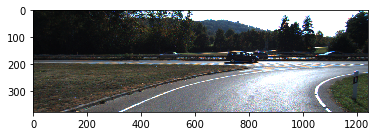

In [42]:
plt.imshow(dataset.get_cam2(0))